# Tutorial on the usage of intrinsic_density_micelle tool

Here, two examples on how to use the intrinsic_density_micelle tool for the calculation of the distribution of components of a micelle. First we will show how to use intrinsic_density to calculate the density of the hydrophobic block of the polymer. Then we will show how to use intrinsic_density_water to calculate the spherical density of the water in the simulation

## spherical_density tool 

Before starting any analysis, load the neccesary modules for this class.

In [23]:
from  utils_mda import MDA_input
#from pysoftk.pol_analysis.tools.utils_mda import MDA_input
from utils_tools import *
#from pysoftk.pol_analysis.tools.utils_tools import *
from clustering import SCP
#from pysoftk.pol_analysis.clustering import SCP
from make_micelle_whole import micelle_whole
#from pysoftk.pol_analysis.make_micelle_whole import micelle_whole
from intrinsic_density_micelle import intrinsic_density
#from pysoftk.pol_analysis.intrinsic_density_micelle import intrinsic_density

import numpy as np
import pandas as pd

1. Select your simulation files, it is recommended to use a tpr file for the topology and xtc file for the trajectory.

In [28]:
topology='data/intrinsic_density_movie.tpr'
trajectory='data/intrinsic_density_movie.xtc'

2. Run the clustering

In [32]:
results_name='data/pictures_tutorial/cyclic_intrinsic_scp_result'

cluster_cutoff = 12

start=0
stop=10001
step=1

atom_names=['C02T']

c = SCP(topology, trajectory).spatial_clustering_run(start, stop, step, atom_names, cluster_cutoff, results_name)


#load the results from SCP
resids_total='data/pictures_tutorial/cyclic_intrinsic_scp_result.parquet'

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 22.20it/s]

The file data/pictures_tutorial/cyclic_intrinsic_scp_result.parquet has been successfully created.
Function spatial_clustering_run Took 2.2583 seconds


3. Obtain the largest micelle from the clustering pandas dataframe

In [33]:
largest_micelle_resids = micelle_whole(topology, trajectory).obtain_largest_micelle_resids(resids_total)

4. 'largest_micelle_resids' is a np.array with the resids of the molecules that belong to the same cluster of the steps of the trajectory where SCP was ran.

In [34]:
largest_micelle_resids

[array([ 1,  2,  3,  4,  6,  7,  8, 11, 12, 13, 14, 15, 17, 18, 19]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 11, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20]),
 array([ 2,  4,  6,  7, 13, 14, 15, 17, 18, 19, 20])]

Now, let's obtain the coordinates of the largest micelle made whole across the periodic boundary conditions (PBC).

5. Let's define the resname of the molecules that we want to reconstruct with the make_whole function. More than one resname can be inputted. Note that it should be the resname of the molecules of the largest_micelle array.

In [35]:
resname=['LIG']


6. Also, the user needs to define the start, step and final step of frames in which the user wants to run the analysis on. Note that they need to be the same as the ones you ran the SCP clustering on.

In [42]:
start=0
stop=10000
step=1

7. Obtain the whole coordinates of the micelle. This is key to perform the densitity calculation taking properly into account the PBC

In [43]:
atom_pos = micelle_whole(topology, trajectory).running_make_cluster_whole(resname, largest_micelle_resids, start, stop, step)

  0%|                                                                                                                                                   | 0/11 [00:00<?, ?it/s]/home/raquellrdc/Desktop/PhD/pysoftk/alejandro_newest_releast_check/pysoftk_analysis_code/test_final/make_micelle_whole.py:347: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  atom_positions_over_trajectory = list(tqdm(map(self.make_cluster_whole, frames, resname, cluster_resids_f[0],
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.47s/it]

Elapsed time for matrix calculation: 17.7199 seconds


Now, atom_pos contains the coordinates of all the atoms of the micelle made whole at each time step selected. In each array, the first element is the time frame of the analysis, and the second the positions array

8. We are almost ready for the density calculation. But first, we need to define the atoms for which you want to calculate the density. In this case, we are going to calculate the density of the hydrophobic block of the polymer, so we are going to select the main backbone atoms of the hydrophobic block. 

In [44]:
MA_names = ['C028', 'C024', 'C022', 'C02E', 'C02I', 'C02M', 'C02Q', 'C02U', 'C02Y', 'C00S', 'C00Q', 'C00M', 
             'C00L', 'C027',  'C023', 'C021',  'C02H',  'C02L',  'C02P',  'C02T', 'C02X', 'C00U',  'C00R',  'C00P', 
             'O00A', 'O00D', 'O00C', 'O01G', 'O01F', 'O01D', 'O01A', 'O019', 'O016', 'O015', 'O010', 'O012', 
             'O00B', 'O00E', 'O01I', 'O01H', 'O01C', 'O01B', 'O01E', 'O018', 'O017', 'O014', 'O00Z', 'O013', 
             'C00O', 'C00W', 'C031', 'C030', 'C02W', 'C02S', 'C02O', 'C02K', 'C02G', 'C02D', 'C026', 'C02B']

9. Also, we need to define the heavy atoms of the solvent. This is neccesary even if we are calculating the density of the polymer components. This means that we need a trajectory with the solvent for the intrinsic density calculation.

In [45]:
water_atom=['OW'] #for water the heavy atom is the Oxygen

10. That's it! We have all the neccesary input files for the spherical density calculation of the hydrophobic component. This function outputs two arrays, the first one are the density values and the second one are the binned space values. This function outputs these two arrays for easier plotting. 

In [46]:
density_whole_MA, binned_space = intrinsic_density(topology, trajectory).run_intrinsic_density(largest_micelle_resids, atom_pos, MA_names, MA_names, water_atom, start, stop, step)

  0%|                                                                                                                                                   | 0/11 [00:00<?, ?it/s]/home/raquellrdc/Desktop/PhD/polymer/pysoftwhere/pySoftWhere/pySoftWhere/ICSI/icsi.py:85: RuntimeWarning: Mean of empty slice
  interface_vals[i][j]=np.nanmean([interface_vals[divmod(ip,len(interface_vals))[1]][divmod(jp,len(interface_vals))[1]] for ip,jp in product(n_i,n_j)])
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:34<00:00,  3.12s/it]
/home/raquellrdc/Desktop/PhD/pysoftk/alejandro_newest_releast_check/pysoftk_analysis_code/test_final/intrinsic_density_micelle.py:280: RuntimeWarning: divide by zero encountered in divide
  final_density=intrinsic_density_profile/S_bar
/home/raquellrdc/Desktop/PhD/pysoftk/alejandro_newest_releast_check/pysoftk_analysis_code/test_final/intrinsic_density_micelle.py:280: 

Note that MA_names is specified twice. This is because for the intrinsic density you need to define the atoms that belong to the (hydrophobic) core of the micelle. So the first specification is used to describe the atoms in the core, and the second time to define the atoms you want to calculate the density of. You do not need ot include all atoms in the core, you can only input at least one atom of the backbone chain per hydrophobic monomer

Also, note that we have left the values to be binned as the default one, but you may want to change them depending on your system

Now, let's plot the density to see how it looks. 

Text(0.5, 1.0, 'Intrinsic density of MA')

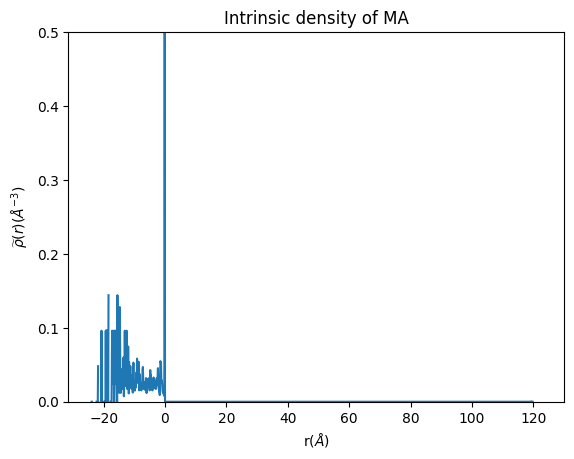

In [47]:
import matplotlib.pyplot as plt

plt.plot(binned_space, density_whole_MA)

plt.xlabel('r($\AA$)')
plt.ylabel('$\widetilde{\u03C1}(r)$($\AA^{-3}$)')
plt.ylim(0, 0.5) #the peak at the interface can be quite high, so this limit is to properly observe the distribution of the component within the micelle
plt.title('Intrinsic density of MA')

Remember that the more data (frames and atoms) that you input, the smoother your density will be

## intrinsic_density_water tool

Now, let's calculate the density of the water in the same simulation. For this we need a different tool, intrinsic_density_water. We are going to use the same trajectory, so no need to load it again. We just need to start by importing the intrinsic_density_water_micelle class

In [48]:
#from pysoftk.pol_analysis.intrinsic_density_water_micelle  import intrinsic_density_water
from intrinsic_density_water_micelle import intrinsic_density_water

We have already obtained the resids of the polymer belonging to the largest micelle as well as the atom positions of the micelle made whole across the PBC. So the only inputs needed for this function are the name of the solvant atoms that we want to calculate the density of. In this case the solvent is water, so we select the oxygen atoms.

In [49]:
water_atoms=['OW']

We are ready to run the density of the water! - This will take longer, since there are many water atoms in the system

In [50]:
density_whole_water, binned_space_water = intrinsic_density_water(topology, trajectory).run_intrinsic_density(largest_micelle_resids, atom_pos, water_atoms, MA_names, water_atoms, start, stop, step)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:58<00:00, 16.22s/it]
/home/raquellrdc/Desktop/PhD/pysoftk/alejandro_newest_releast_check/pysoftk_analysis_code/test_final/intrinsic_density_water_micelle.py:332: RuntimeWarning: divide by zero encountered in divide
  final_density=intrinsic_density_profile/S_bar
/home/raquellrdc/Desktop/PhD/pysoftk/alejandro_newest_releast_check/pysoftk_analysis_code/test_final/intrinsic_density_water_micelle.py:332: RuntimeWarning: invalid value encountered in divide
  final_density=intrinsic_density_profile/S_bar


At this point, it is also needed to specify the core of the micelle, since the intrinsic density is estimated with respect to the core-shell interface. That is why we need to again input 'MA_names' that contains some of the atoms of the hydrophobic block of the polymer.

Now let's plot it to see how it looks

Text(0.5, 1.0, 'Intrinsic density of Water')

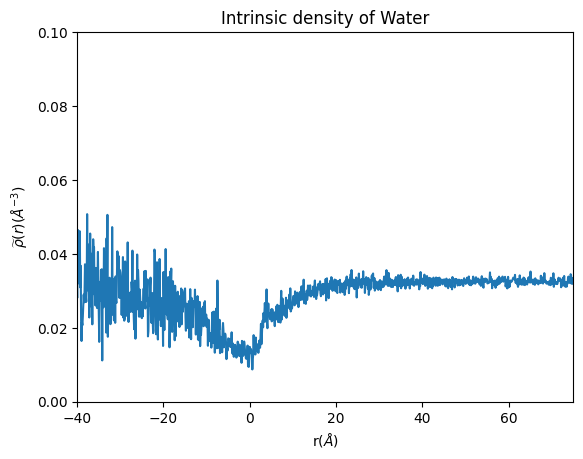

In [52]:
plt.plot(binned_space_water, density_whole_water)

plt.xlabel('r($\AA$)')
plt.ylabel('$\widetilde{\u03C1}(r)$($\AA^{-3}$)')
plt.ylim(0, 0.1)
plt.xlim(-40, 75) # the densities of the far end reach very high values that are just artifacts of the calculations of the intrinsic density performed very far away from the micelle.
plt.title('Intrinsic density of Water')

Looks like this micelle is not very stable since it has a lot of water in the core!